In [1]:
import pandas as pd
import numpy as np

In [3]:
# Read a CSV file named 'data.csv'
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')

# Print the first 5 rows to verify
print(df.head())

   engine_displacement  num_cylinders  horsepower  vehicle_weight  \
0                  170            3.0       159.0     3413.433759   
1                  130            5.0        97.0     3149.664934   
2                  170            NaN        78.0     3079.038997   
3                  220            4.0         NaN     2542.392402   
4                  210            1.0       140.0     3460.870990   

   acceleration  model_year  origin fuel_type         drivetrain  num_doors  \
0          17.7        2003  Europe  Gasoline    All-wheel drive        0.0   
1          17.8        2007     USA  Gasoline  Front-wheel drive        0.0   
2          15.1        2018  Europe  Gasoline  Front-wheel drive        0.0   
3          20.2        2009     USA    Diesel    All-wheel drive        2.0   
4          14.4        2009  Europe  Gasoline    All-wheel drive        2.0   

   fuel_efficiency_mpg  
0            13.231729  
1            13.688217  
2            14.246341  
3         

In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [5]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['origin', 'fuel_type', 'drivetrain']

In [6]:
print(df.head())

   engine_displacement  num_cylinders  horsepower  vehicle_weight  \
0                  170            3.0       159.0     3413.433759   
1                  130            5.0        97.0     3149.664934   
2                  170            NaN        78.0     3079.038997   
3                  220            4.0         NaN     2542.392402   
4                  210            1.0       140.0     3460.870990   

   acceleration  model_year  origin fuel_type         drivetrain  num_doors  \
0          17.7        2003  Europe  Gasoline    All-wheel drive        0.0   
1          17.8        2007     USA  Gasoline  Front-wheel drive        0.0   
2          15.1        2018  Europe  Gasoline  Front-wheel drive        0.0   
3          20.2        2009     USA    Diesel    All-wheel drive        2.0   
4          14.4        2009  Europe  Gasoline    All-wheel drive        2.0   

   fuel_efficiency_mpg  
0            13.231729  
1            13.688217  
2            14.246341  
3         

In [7]:
df1 = df[['engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg']].copy()

In [8]:
df1

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [9]:
#Q1
df1.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [10]:
#Q2
median_score = df1['horsepower'].median()

In [11]:
median_score

np.float64(149.0)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='horsepower', ylabel='Count'>

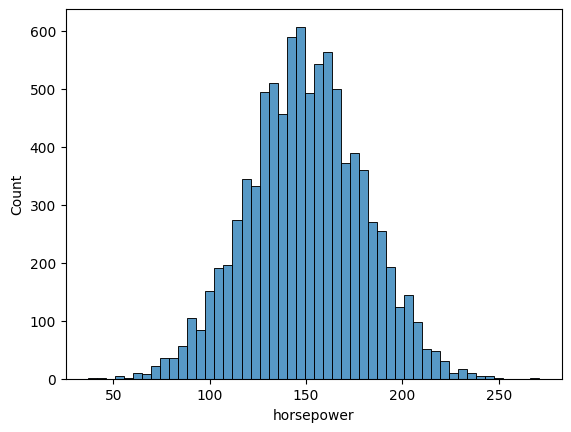

In [13]:
#Q3-missing values as 0 or mean
#depends on the distribution of the values of hp
sns.histplot(df1.horsepower, bins=50)

In [14]:
#missing value can be filled with mean as the distribution is normal
# 1. Calculate the mean of column 'horsepower'
mean_horsepower = df1['horsepower'].mean()
print(f"\nMean of column horsepower: {mean_horsepower}")


Mean of column horsepower: 149.65729212983547


In [15]:
# 2. Fill missing values in column 'horsepower' with its mean
df1['horsepower'] = df1['horsepower'].fillna(mean_horsepower) 

In [16]:
df1.isnull().sum()

engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
fuel_efficiency_mpg    0
dtype: int64

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

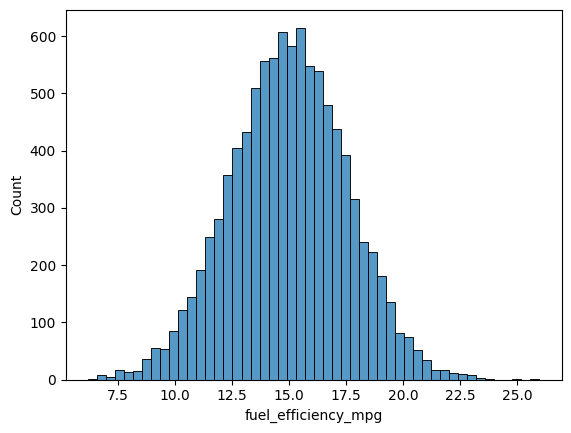

In [17]:
sns.histplot(df1.fuel_efficiency_mpg, bins=50)

In [18]:
#splitting dataframe into train, validation and test sets
n = len(df1)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [19]:
n, n_val, n_test, n_train

(9704, 1940, 1940, 5824)

In [20]:
df_train = df1.iloc[:n_train]
df_val = df1.iloc[n_train:n_train+n_val]
df_test = df1.iloc[n_train+n_val:]

In [21]:
idx = np.arange(n)

In [22]:
idx

array([   0,    1,    2, ..., 9701, 9702, 9703], shape=(9704,))

In [23]:
#randomising indexes so the train, val and test are randomised
np.random.seed(2)
np.random.shuffle(idx)

In [24]:
df_train

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.000000,3413.433759,2003,13.231729
1,130,97.000000,3149.664934,2007,13.688217
2,170,78.000000,3079.038997,2018,14.246341
3,220,149.657292,2542.392402,2009,16.912736
4,210,140.000000,3460.870990,2009,12.488369
...,...,...,...,...,...
5819,160,156.000000,2990.334203,2020,15.294958
5820,240,105.000000,3495.100812,2014,12.426054
5821,210,171.000000,3434.252180,2011,12.509291
5822,180,172.000000,2967.708852,2018,14.746571


In [25]:
df_test

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
7764,210,136.0,3001.227490,2004,14.272374
7765,290,142.0,3190.590332,2010,14.562889
7766,240,120.0,3518.444921,2008,11.872658
7767,220,141.0,1909.631801,2015,19.731391
7768,170,114.0,3825.442821,2009,10.344815
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [26]:
df_val

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
5824,190,154.000000,3155.165485,2019,14.240172
5825,160,134.000000,3401.093783,2007,13.962501
5826,160,164.000000,3799.748282,2004,11.426805
5827,170,140.000000,3508.135917,2001,11.832029
5828,60,169.000000,2289.214556,2010,18.443872
...,...,...,...,...,...
7759,170,104.000000,3658.729114,2011,11.653651
7760,210,144.000000,2007.295032,2018,19.564821
7761,230,167.000000,3204.388711,2002,14.120344
7762,170,109.000000,4126.979051,2016,9.080170


In [27]:
#randomising indexes so the train, val and test are randomised
np.random.seed(2)
np.random.shuffle(idx)
df_train = df1.iloc[idx[:n_train]]
df_val = df1.iloc[idx[n_train:n_train+n_val]]
df_test = df1.iloc[idx[n_train+n_val:]]

In [28]:
df_train

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
7094,130,140.000000,2958.050037,2008,15.069176
8304,310,181.000000,4126.320291,2004,8.799974
9688,260,149.657292,3948.404625,2018,11.054830
5162,280,157.000000,2728.375114,2002,15.327159
230,190,90.000000,3603.494149,2016,11.542828
...,...,...,...,...,...
1763,150,163.000000,2564.488443,2012,16.876751
6931,210,137.000000,2786.666205,2016,16.124496
2381,110,159.000000,3634.283068,2022,10.828310
7426,230,158.000000,2705.486173,2003,16.949051


In [29]:
df_val

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
4827,190,113.000000,3337.669404,2007,12.603200
9287,170,149.657292,2346.371579,2007,17.172016
1252,240,143.000000,3037.211798,2009,15.969536
3746,150,152.000000,2524.407794,2012,16.667294
1099,150,201.000000,2925.864524,2017,15.636663
...,...,...,...,...,...
5701,200,131.000000,2174.192315,2020,18.829223
6760,220,136.000000,2875.444048,2004,14.823140
5630,170,130.000000,2553.118367,2014,17.623736
1780,210,113.000000,2951.724606,2004,14.716839


In [30]:
#Target variables
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [42]:
y_train, y_val, y_test

(array([15.0691757 ,  8.79997396, 11.05482975, ..., 10.82830955,
        16.94905102, 12.74946316], shape=(5824,)),
 array([12.60320033, 17.17201591, 15.96953599, ..., 17.62373586,
        14.71683899, 13.71330513], shape=(1940,)),
 array([ 9.91058768, 16.04096631, 16.6744814 , ..., 20.42510922,
        19.0587994 , 17.43922166], shape=(1940,)))

In [43]:
#Dropping target variables from the features dataframes
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

KeyError: 'fuel_efficiency_mpg'

In [44]:
df_train

,engine_displacement,horsepower,vehicle_weight,model_year
7094,130,140.000000,2958.050037,2008
8304,310,181.000000,4126.320291,2004
9688,260,149.657292,3948.404625,2018
5162,280,157.000000,2728.375114,2002
230,190,90.000000,3603.494149,2016
...,...,...,...,...
1763,150,163.000000,2564.488443,2012
6931,210,137.000000,2786.666205,2016
2381,110,159.000000,3634.283068,2022
7426,230,158.000000,2705.486173,2003


In [38]:
base = ['engine_displacement','horsepower','vehicle_weight']
X_train = df_train[base].fillna(0).values

def train_linear_regression(X_train, y_train):
    ones = np.ones(X_train.shape[0])
    X_train = np.column_stack([ones, X_train])

    XTX = X_train.T.dot(X_train)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X_train.T).dot(y_train)
    
    return w_full[0], w_full[1:]

In [45]:
X_train

array([[ 130.        ,  140.        , 2958.05003682],
       [ 310.        ,  181.        , 4126.32029106],
       [ 260.        ,  149.65729213, 3948.40462523],
       ...,
       [ 110.        ,  159.        , 3634.28306755],
       [ 230.        ,  158.        , 2705.48617331],
       [ 110.        ,  144.        , 3469.80918607]], shape=(5824, 3))

In [48]:
X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [49]:
w0

np.float64(28.501063566717313)

<Axes: ylabel='Count'>

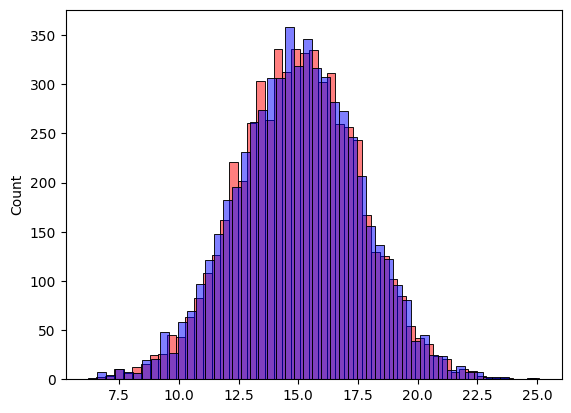

In [50]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [51]:
#define rmse
def rmse(y_train, y_pred):
    se = (y_train - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)
rmse(y_train, y_pred)

np.float64(0.46137664835668074)

In [52]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X


In [53]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.46630943018224114)

In [54]:
X_val

array([[ 190.        ,  113.        , 3337.66940369],
       [ 170.        ,  149.65729213, 2346.37157875],
       [ 240.        ,  143.        , 3037.21179847],
       ...,
       [ 170.        ,  130.        , 2553.11836697],
       [ 210.        ,  113.        , 2951.72460614],
       [ 200.        ,  147.        , 3246.73898038]], shape=(1940, 3))

In [55]:
base

['engine_displacement', 'horsepower', 'vehicle_weight']

In [56]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df['model_year']
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [57]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)


np.float64(0.4663759560530883)

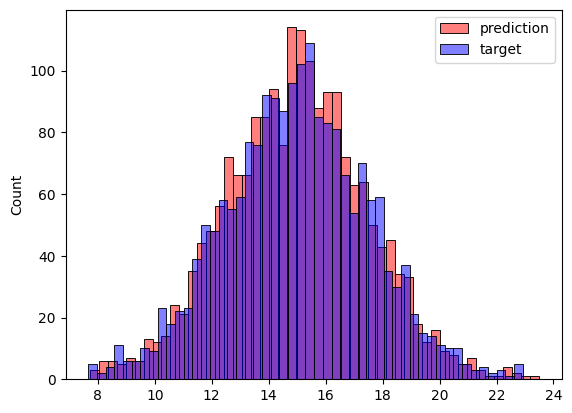

In [58]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()


In [59]:
#Gram Matrix
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [60]:
X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression_reg(X_train, y_train)

y_pred = w0 + X_train.dot(w)


In [61]:
y_pred

array([15.09094369,  9.66875963, 10.2354707 , ..., 11.88539977,
       16.55777251, 12.55861809], shape=(5824,))

In [62]:
rmse(y_train, y_pred)

np.float64(0.4613766504584093)

In [76]:
#RMSE for y_train and y_val without regularisation
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
y_train_pred = w0 + X_train.dot(w)
rmse(y_train, y_train_pred)

X_val = prepare_X(df_val)
y_val_pred = w0 + X_val.dot(w)
rmse(y_val, y_val_pred)

np.float64(0.4663759560530883)

In [78]:
#RMSE for y_train and y_val with regularisation
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)
y_train_pred_reg = w0 + X_train.dot(w)
rmse(y_train, y_train_pred_reg)

X_val = prepare_X(df_val)
y_val_pred_reg = w0 + X_val.dot(w)
rmse(y_val, y_val_pred_reg)

np.float64(0.4663773227013992)

In [79]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10, 100]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0.0 28.503780410694652 0.4663759560530883
1e-05 28.503776400787185 0.4663759697000174
0.0001 28.503740311668867 0.46637609254016194
0.001 28.503379425518798 0.4663773227013992
0.1 28.463737661620776 0.4665321131036755
1 28.108352524268714 0.46965155127125274
10 24.98841799208112 0.6097360235410834
100 11.843125107094842 1.8668003364569514


In [80]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
X_full_train = prepare_X(df_full_train)
X_full_train

array([[ 1.30000000e+02,  1.40000000e+02,  2.95805004e+03,
         9.00000000e+00],
       [ 3.10000000e+02,  1.81000000e+02,  4.12632029e+03,
         1.30000000e+01],
       [ 2.60000000e+02,  1.49657292e+02,  3.94840463e+03,
        -1.00000000e+00],
       ...,
       [ 1.70000000e+02,  1.30000000e+02,  2.55311837e+03,
         3.00000000e+00],
       [ 2.10000000e+02,  1.13000000e+02,  2.95172461e+03,
         1.30000000e+01],
       [ 2.00000000e+02,  1.47000000e+02,  3.24673898e+03,
        -3.00000000e+00]], shape=(7764, 4))

In [83]:
y_full_train = np.concatenate([y_train, y_val])

In [84]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

np.float64(0.4631929130296638)